In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

In [2]:
kaggle_token = {"username":"kannama07",
                "key":"ed92d26ed5b54a42232d1568ca6ed8c8"
                }

# Create the ~/.kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Save the token file there
with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(kaggle_token, file)

!chmod 600 /root/.kaggle/kaggle.json

print("Kaggle authentication setup completed.")

Kaggle authentication setup completed.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saifurrahmanshatil/retinal-oct-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/retinal-oct-dataset


In [4]:
!kaggle datasets download -dsaifurrahmanshatil/retinal-oct-dataset

Dataset URL: https://www.kaggle.com/datasets/saifurrahmanshatil/retinal-oct-dataset
License(s): other
  0% 0.00/44.3M [00:00<?, ?B/s]
100% 44.3M/44.3M [00:00<00:00, 1.29GB/s]


In [5]:
import zipfile
# Extract to a folder named "alzheimer"
with zipfile.ZipFile("retinal-oct-dataset.zip", 'r') as zip_ref:
   zip_ref.extractall("retinal-oct-dataset")
print("Dataset unzipped!")

Dataset unzipped!


In [6]:
retinal_classes = os.listdir("/content/retinal-oct-dataset/OCTID")
print("Retinal classes:", retinal_classes)

Retinal classes: ['Macular-Hole-Retinal-OCT-images', 'Normal-Retinal-OCT-images', 'Central-serous-retinopathy-retinal-OCT-images', 'Diabetic-Retinopathy-Retinal-OCT-Images', 'Age-related-Macular-Degeneration-Retinal-OCT-images']


In [7]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [9]:
 train_generator = train_datagen.flow_from_directory('/content/retinal-oct-dataset/OCTID',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
 )

Found 459 images belonging to 5 classes.


In [10]:
 val_generator = train_datagen.flow_from_directory('/content/retinal-oct-dataset/OCTID',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
     )

Found 113 images belonging to 5 classes.


In [11]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

In [12]:
print("Class indices : ",class_indices)
print("Class names : ",class_names)

Class indices :  {'Age-related-Macular-Degeneration-Retinal-OCT-images': 0, 'Central-serous-retinopathy-retinal-OCT-images': 1, 'Diabetic-Retinopathy-Retinal-OCT-Images': 2, 'Macular-Hole-Retinal-OCT-images': 3, 'Normal-Retinal-OCT-images': 4}
Class names :  ['Age-related-Macular-Degeneration-Retinal-OCT-images', 'Central-serous-retinopathy-retinal-OCT-images', 'Diabetic-Retinopathy-Retinal-OCT-Images', 'Macular-Hole-Retinal-OCT-images', 'Normal-Retinal-OCT-images']


In [13]:
 model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(5, activation='softmax')
 ])
 model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,037 (91.20 MB)

 Trainable params: 23,908,037 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(train_generator,epochs=7,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2755 - loss: 4.3775 - val_accuracy: 0.4779 - val_loss: 1.1863
Epoch 2/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5263 - loss: 1.1084 - val_accuracy: 0.6018 - val_loss: 0.8910
Epoch 3/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6578 - loss: 0.7997 - val_accuracy: 0.6283 - val_loss: 0.9102
Epoch 4/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7143 - loss: 0.6501 - val_accuracy: 0.5929 - val_loss: 0.8844
Epoch 5/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8789 - loss: 0.3738 - val_accuracy: 0.6372 - val_loss: 0.8987
Epoch 6/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8893 - loss: 0.3896 - val_accuracy: 0.6018 - val_loss: 0.7634
Epoch 7/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9517 - loss: 0.2007 - val_accuracy: 0.6549 - val_loss: 0.8792


In [15]:
# Make sure the previous cell defining and compiling the model has been executed
model.save('/content/drive/MyDrive/retinal-oct-dataset/Retinal_model.h5')

In [16]:
 model = load_model('/content/drive/MyDrive/retinal-oct-dataset/Retinal_model.h5')
 print("Model Loaded")

Model Loaded


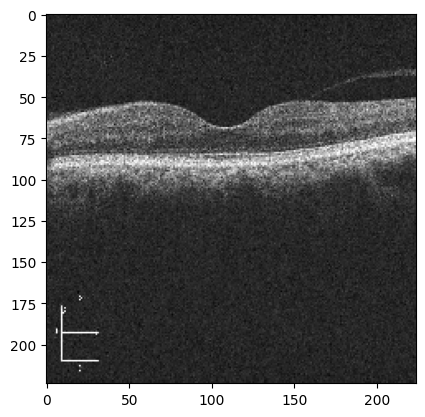

In [17]:
test_image_path="/content/retinal-oct-dataset/OCTID/Normal-Retinal-OCT-images/NORMAL100.jpeg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [18]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.

In [19]:
 prediction = model.predict(img_array)
 ind=np.argmax(prediction)
 prediction=prediction[0][ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [20]:
inv_labels = {v: k for k, v in class_indices.items()}

predicted_class = inv_labels[ind]
print(" Predicted class:", predicted_class)
if predicted_class == "NonDemented":
    print(" Your Retinal Scan was affected by Diseases.")
else:
    print(f" Your Retinal Scan was normal: {predicted_class}")

 Predicted class: Normal-Retinal-OCT-images
 Your Retinal Scan was normal: Normal-Retinal-OCT-images
